In [52]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import sklearn
from sklearn.model_selection import train_test_split
from rich.progress import Progress
import random
from tensorflow import keras
import seaborn as sns
from keras import models,layers
from tensorflow.keras.datasets import mnist
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve,average_precision_score

In [13]:
Raw_dir = '../data/raw'
Processed_dir = '../data/processed'
Figure_path = '../outputs'
Img_Size = (28,28)
data_classes = np.array(['0','1','2','3','4','5','6','7','8','9'])

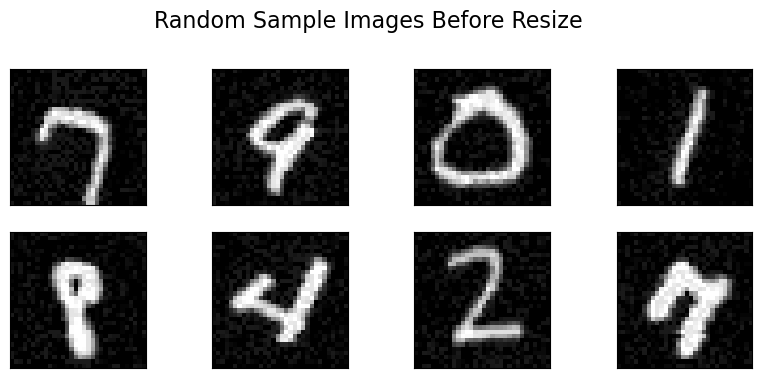

In [14]:
def show_raw_images(directory):
    All_images = []

    for digit in range(10):
        digit_folder = os.path.join(directory, str(digit))
        if os.path.exists(digit_folder):
            for img_file in os.listdir(digit_folder):
                All_images.append(os.path.join(digit_folder, img_file))
    
    if len(All_images) == 0:
        print("No images found in the directory!")
        return

    num_samples = min(8, len(All_images))
    random_images = random.sample(All_images, num_samples)
    
    plt.figure(figsize=(10,6))
    
    for i, img_path in enumerate(random_images):
        img = cv2.imread(img_path)               
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(3,4,i+1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

    plt.suptitle("Random Sample Images Before Resize", fontsize=16)
    plt.show()

directory = os.path.join(Raw_dir,'mnist')
show_raw_images(directory)

In [15]:
def resized(directory):
    All_images = []

    for digit in range(10):
        digit_folder = os.path.join(directory, str(digit))

        if not os.path.exists(digit_folder):
            continue

        for img_file in os.listdir(digit_folder):
            image_path = os.path.join(digit_folder, img_file)

            image = cv2.imread(image_path)
            if image is None:
                continue

            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (28, 28))
            image = image.astype("float32") / 255.0
            image = image.reshape(28, 28, 1)

            All_images.append((image, digit))

    if len(All_images) == 0:
        print("No images found in the directory!")
        return None, None

    X, Y = zip(*All_images)

    return np.array(X), np.array(Y)

In [16]:
directory = os.path.join(Raw_dir,'mnist')
X,Y = resized(directory)

In [17]:
print(X.shape,Y.shape)

(60000, 28, 28, 1) (60000,)


In [18]:
print(X[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.03529412]
  [0.01176471]
  [0.        ]
  [0.00392157]
  [0.02745098]
  [0.        ]
  [0.01960784]
  [0.01176471]
  [0.00392157]
  [0.        ]
  [0.03529412]
  [0.01568628]
  [0.04705882]
  [0.        ]
  [0.        ]
  [0.00392157]
  [0.03529412]
  [0.01176471]
  [0.07450981]
  [0.        ]
  [0.00784314]
  [0.00784314]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00392157]
  [0.00784314]
  [0.        ]
  [0.00784314]
  [0.        ]
  [0.01176471]
  [0.01960784]
  [0.00392157]
  [0.05490196]
  [0.00392157]
  [0.01960784]
  [0.00392157]
  [0.        ]
  [0.01176471]
  [0.00784314]
  [0.03137255]
  [0.01960784]
  [0.07058824]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00392157]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.01960784]
  [0.02745098]
  [0.        ]
  [0.04705882]
  [0.        ]
  [0.00784314]
  [0.0

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=2,test_size=0.2,stratify=Y)

In [20]:
print(X_train.shape)

(48000, 28, 28, 1)


In [21]:
print(X_test.shape)

(12000, 28, 28, 1)


In [22]:
def split_results():
    for value in X_train.shape:
        print(Y_train)

In [23]:
print('Train Data Results for each Classes:')
split_results()
# print('\nTest Data Results for each Classes:')
# split_results(os.path.join(Processed_dir,'test'))

Train Data Results for each Classes:
[6 1 3 ... 8 3 9]
[6 1 3 ... 8 3 9]
[6 1 3 ... 8 3 9]
[6 1 3 ... 8 3 9]


In [24]:
# counts = {"train": 0, "test": 0}

# for split in ["train", "test"]:
#     total = 0
#     for digit in range(10):
#         digit_folder = os.path.join(Processed_dir, split, str(digit))

#         if os.path.exists(digit_folder):
#             total += len(os.listdir(digit_folder))

#     counts[split] = total

# labels = ["Train", "Test"]
# total_count = [counts["train"], counts["test"]]

# colors = sns.color_palette("bright")

# plt.figure(figsize=(7, 4))
# plt.pie(total_count, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
# plt.title("Distribution of Split Data")
# plt.axis('equal')
# plt.tight_layout()

# save_path = os.path.join(Figure_path, "split_distribution.png")
# plt.savefig(save_path)
# print(f"Saved plot: {save_path}")

# plt.show()

In [25]:
# for split in ['train','test']:

#     counts = {str(i): 0 for i in range(10)}   # reset for each split

#     for digit in range(10):
#         digit_folder = os.path.join(Processed_dir, split, str(digit))

#         if os.path.exists(digit_folder):
#             counts[str(digit)] = len(os.listdir(digit_folder))
#         else:
#             counts[str(digit)] = 0

#     plt.figure(figsize=(7,5))
#     sns.barplot(
#         x=data_classes,
#         y=[counts[d] for d in data_classes],
#         palette="pastel"
#     )

#     plt.title(f'{split.capitalize()} Dataset Distribution')
#     plt.xlabel("Digit Class")
#     plt.ylabel("Number of Images")
#     plt.tight_layout()

#     save_path = os.path.join(Figure_path, f"{split}_distribution.png")
#     plt.savefig(save_path)
#     print(f"Saved plot: {save_path}")
#     plt.show()

In [26]:
def build_lenet_model():
    model = models.Sequential([
        layers.Conv2D(6,kernel_size=5,activation='tanh',input_shape=(28,28,1)),
        layers.AveragePooling2D(pool_size=(2,2)),
        layers.Conv2D(16,kernel_size=5,activation='tanh'),
        layers.AveragePooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(120,activation='tanh'),
        layers.Dense(84,activation='tanh'),
        layers.Dense(10,activation='softmax'),
    ])

    return model

In [27]:
model = build_lenet_model()

c:\ProgramData\anaconda3\envs\ML\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['Accuracy'])

In [29]:
hist = model.fit(X_train,Y_train,epochs=10,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - Accuracy: 0.8925 - loss: 0.3469 - val_Accuracy: 0.9423 - val_loss: 0.1800
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - Accuracy: 0.9528 - loss: 0.1524 - val_Accuracy: 0.9579 - val_loss: 0.1351
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - Accuracy: 0.9672 - loss: 0.1035 - val_Accuracy: 0.9713 - val_loss: 0.0986
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - Accuracy: 0.9761 - loss: 0.0762 - val_Accuracy: 0.9753 - val_loss: 0.0824
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - Accuracy: 0.9821 - loss: 0.0565 - val_Accuracy: 0.9787 - val_loss: 0.0724
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - Accuracy: 0.9856 - loss: 0.0447 - val_Accuracy: 0.9783 - val_loss: 0.0749
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - Accuracy: 0.9883 - loss: 0.0370 - val_Accuracy: 0.9804 - val_loss: 0.0670
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - Accuracy: 0.9910 - loss: 0.02

In [35]:
loss_train = hist.history['loss']
accuracy_train = hist.history['Accuracy']

loss_test = hist.history['val_loss']
accuracy_test = hist.history['val_Accuracy']

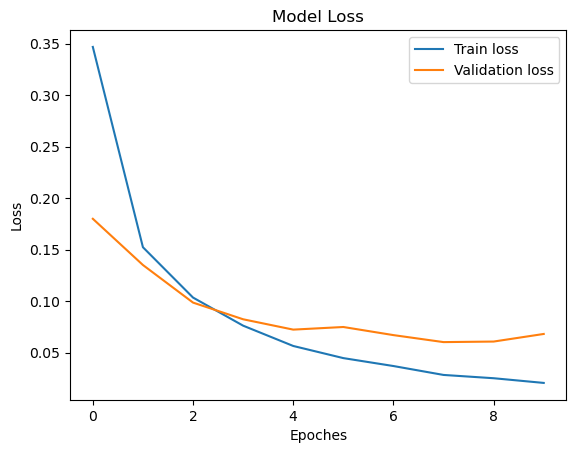

In [36]:
plt.figure()
plt.plot(loss_train)
plt.plot(loss_test)
plt.title('Model Loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend(['Train loss','Validation loss'])
plt.show()

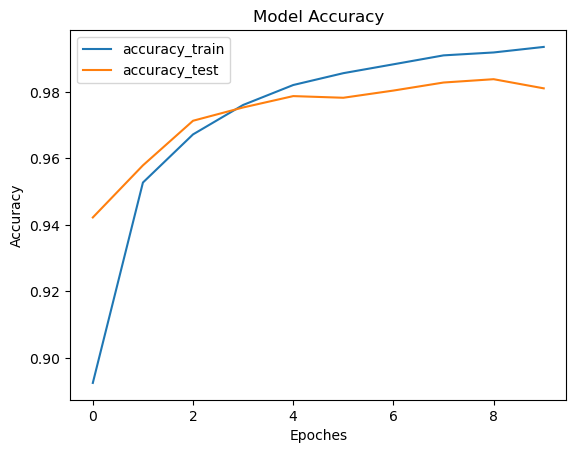

In [37]:
plt.figure()
plt.plot(accuracy_train)
plt.plot(accuracy_test)
plt.title('Model Accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend(['accuracy_train','accuracy_test'])
plt.show()

In [30]:
score,acc = model.evaluate(X_test,Y_test)
print('Test Loss =',score)
print('Test Accuracy =',acc)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.9811 - loss: 0.0682
Test Loss = 0.06816250830888748
Test Accuracy = 0.981083333492279


In [31]:
model.save('../models/mnist_prediction_model.h5')

In [41]:
prediction = model.predict(X_test)
y_prd = np.argmax(prediction,axis=1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [42]:
print(y_prd[5])
print(Y_test[5])

2
2


Saved heatmap to ../outputs/heatmap.png


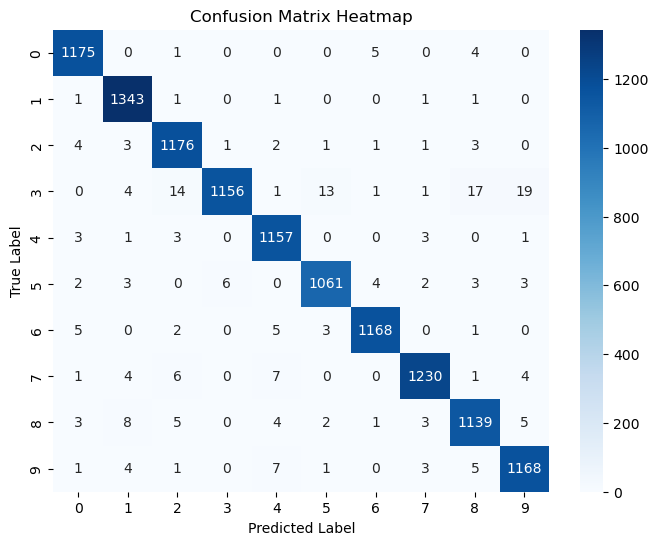

In [55]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_prd)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=range(10),
    yticklabels=range(10)
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
save_path = '../outputs/heatmap.png'
plt.savefig(save_path, dpi=300, bbox_inches="tight")
print(f"Saved heatmap to {save_path}")
plt.show()

In [56]:
Y_test_bin = label_binarize(Y_test, classes=[0,1,2,3,4,5,6,7,8,9])

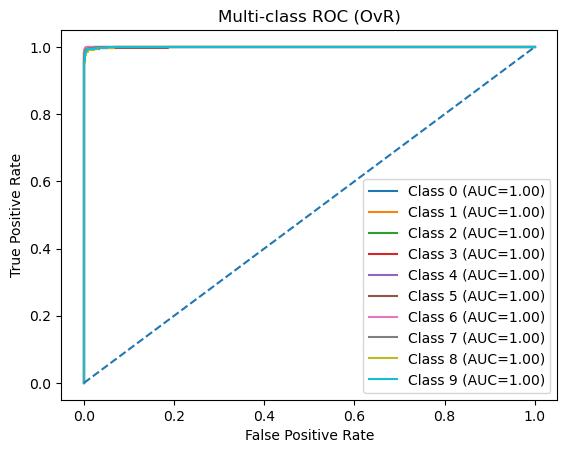

In [57]:
plt.figure()

for i in range(10):
    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], prediction[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC={roc_auc:.2f})')

plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC (OvR)')
plt.legend()
plt.show()


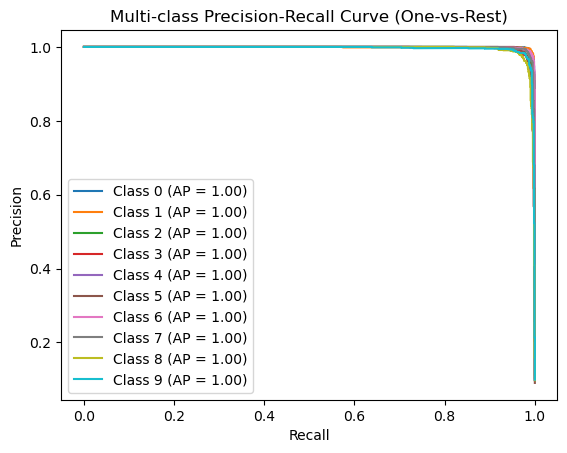

In [54]:
plt.figure()

for i in range(10):
    precision, recall, _ = precision_recall_curve(
        Y_test_bin[:, i],
        prediction[:, i]
    )
    
    avg_precision = average_precision_score(
        Y_test_bin[:, i],
        prediction[:, i]
    )
    
    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-class Precision-Recall Curve (One-vs-Rest)')
plt.legend()
plt.show()